In [1]:
from typing import TypedDict


class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float 
    total_inr: float 

In [9]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd']*1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd']* 85
    return state

In [13]:
from langgraph.graph import StateGraph, START,END

builder = StateGraph(PortfolioState)


## adding nodes
print("adding the nodes ")
builder.add_node("calculate_total_node",calc_total)
builder.add_node("calculate_inr",convert_to_inr)

## adding edges
print("Adding edges")
builder.add_edge(START,"calculate_total_node")
builder.add_edge("calculate_total_node","calculate_inr")
builder.add_edge("calculate_inr",END)

graph = builder.compile()

adding the nodes 
Adding edges


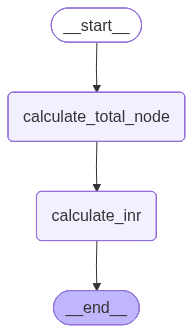

In [16]:
from IPython.display import display ,Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
graph.invoke({"amount_usd":1})

{'amount_usd': 1, 'total_usd': 1.08, 'total_inr': 91.80000000000001}